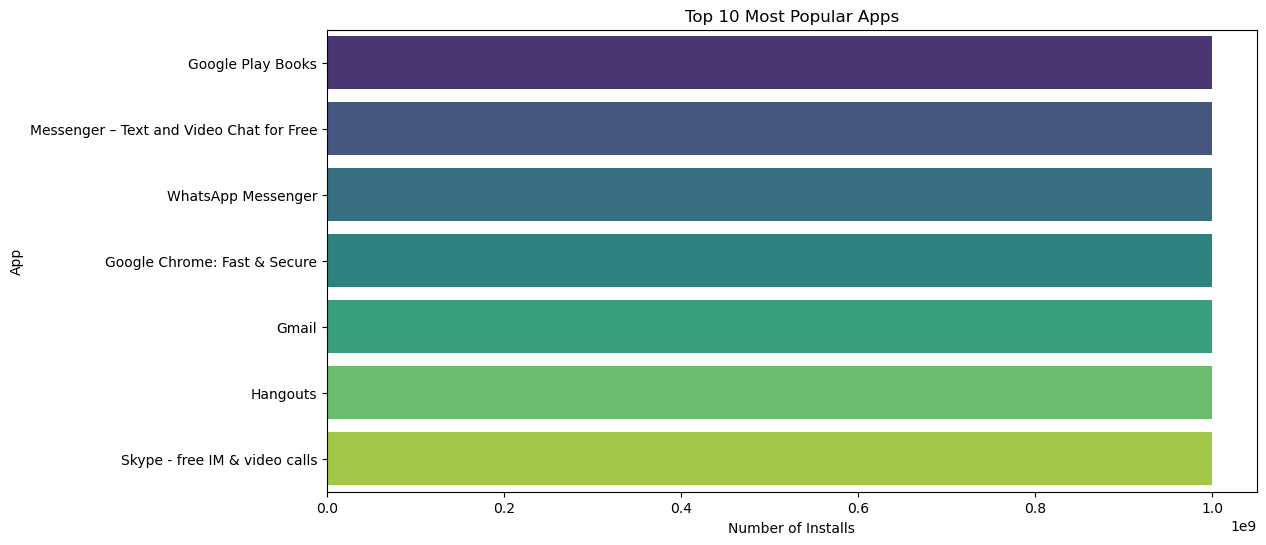

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#task14

# Function to clean and convert 'Installs' column to numeric
def clean_installs(value):
    try:
        # Extract the numeric part of the string, e.g., '10,000+' becomes 10000
        return int(''.join(filter(str.isdigit, value)))
    except:
        return 0

# Clean and convert 'Installs' column
playstore_data['Installs'] = playstore_data['Installs'].apply(clean_installs)

# Top 10 most popular apps
top_apps = playstore_data.nlargest(10, 'Installs')

# Bar chart for top 10 most popular apps
plt.figure(figsize=(12, 6))
sns.barplot(x='Installs', y='App', data=top_apps, palette='viridis')
plt.title('Top 10 Most Popular Apps')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.show()

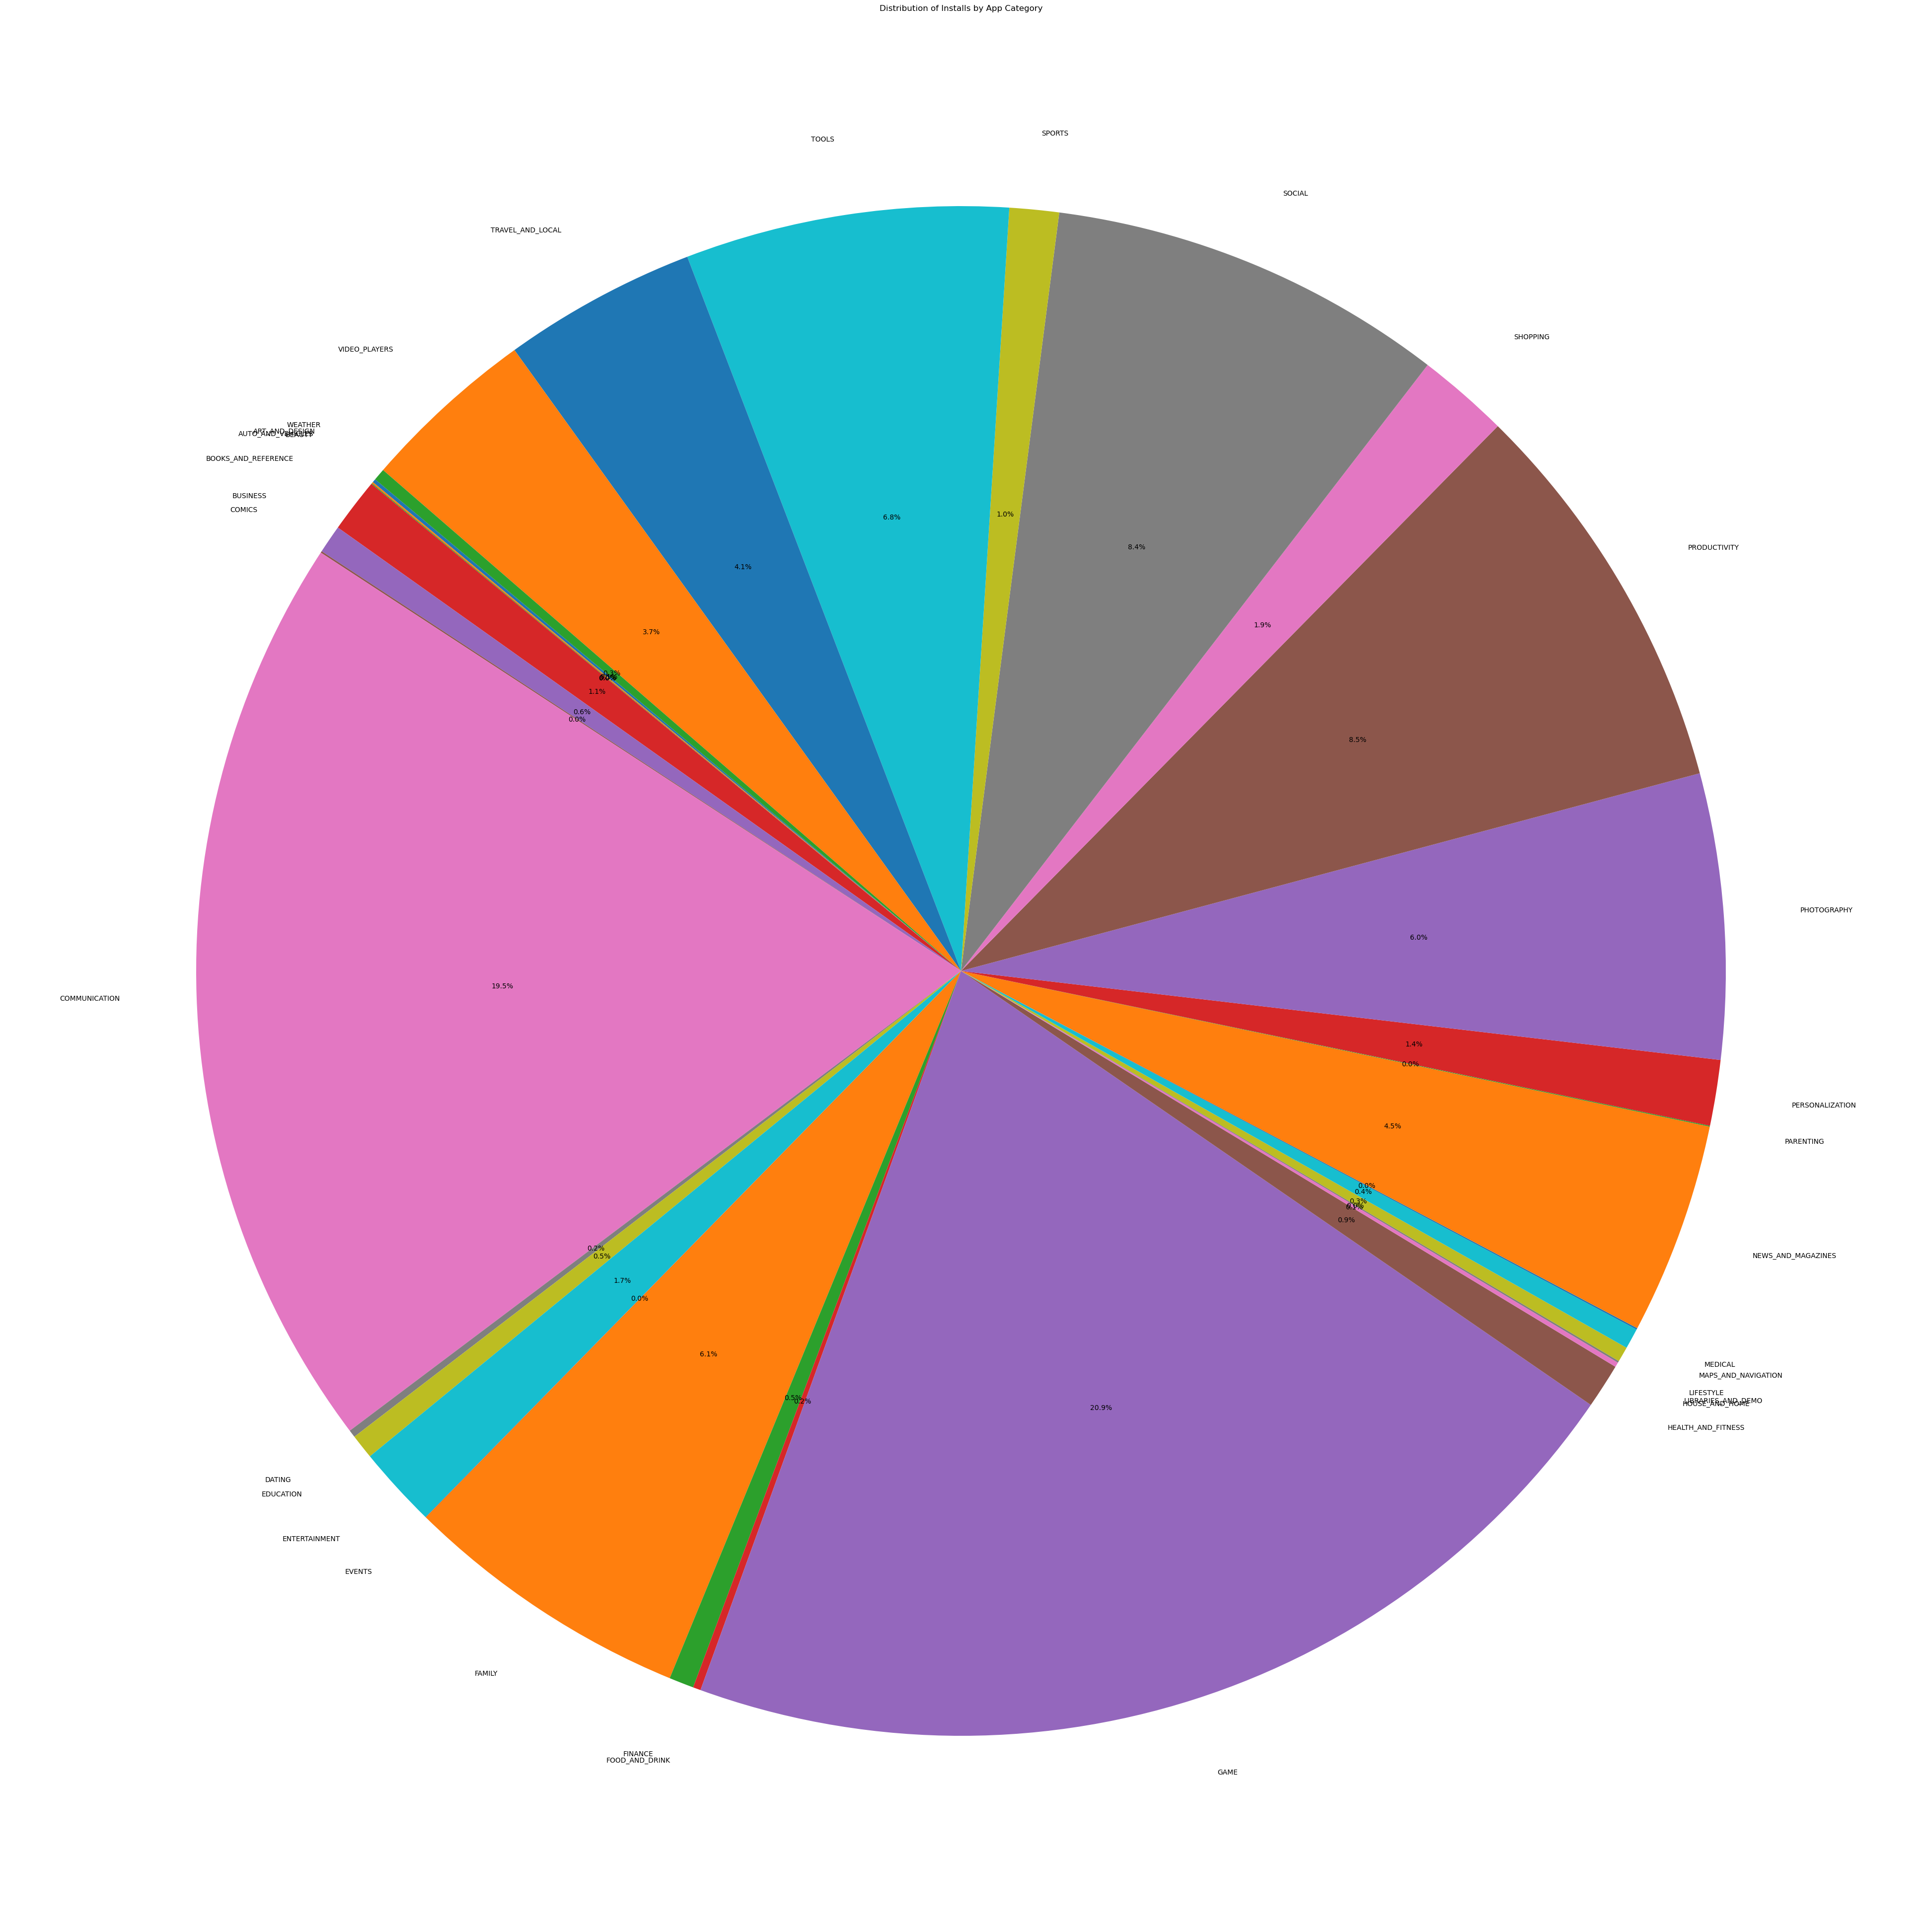

In [3]:
#task15
# Ensure 'Installs' is treated as a string
playstore_data['Installs'] = playstore_data['Installs'].astype(str)

# Clean the 'Installs' column and convert it to numeric
playstore_data['Installs'] = playstore_data['Installs'].str.replace(',', '')
playstore_data['Installs'] = pd.to_numeric(playstore_data['Installs'], errors='coerce')

# Drop rows with NaN values in 'Installs' column
playstore_data = playstore_data.dropna(subset=['Installs'])

# Calculate total installs for each category
category_installs = playstore_data.groupby('Category')['Installs'].sum()

# Pie chart for popular app categories
plt.figure(figsize=(50,50))
plt.pie(category_installs, labels=category_installs.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Installs by App Category')
plt.show()

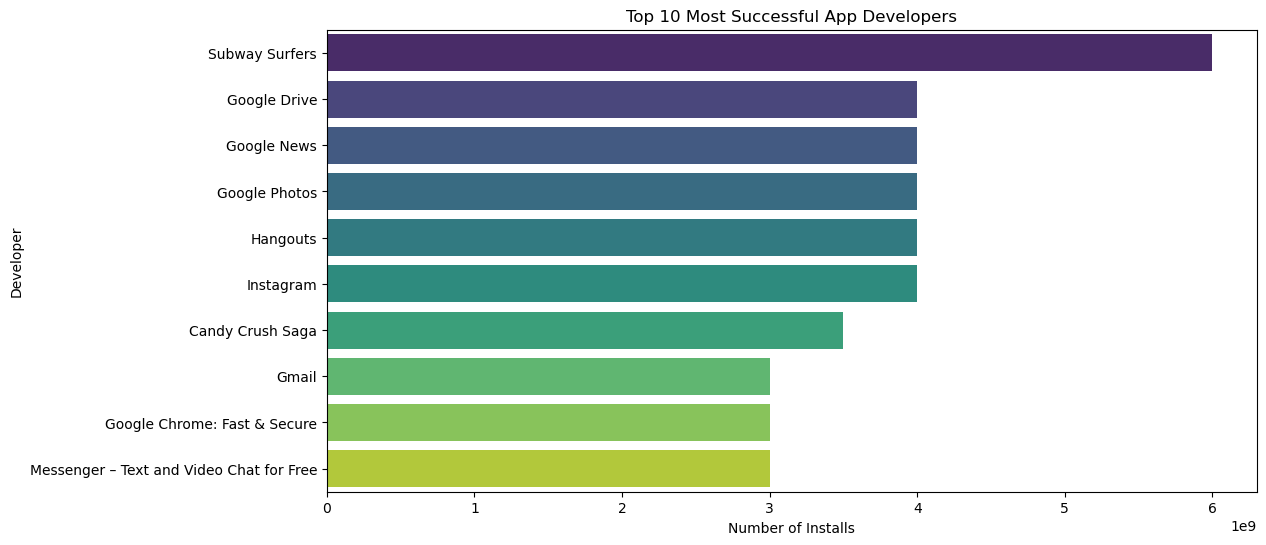

In [11]:
#task16
# Ensure 'Installs' is treated as a string
playstore_data['Installs'] = playstore_data['Installs'].astype(str)

# Clean the 'Installs' column and convert it to numeric
playstore_data['Installs'] = playstore_data['Installs'].str.replace(',', '')
playstore_data['Installs'] = pd.to_numeric(playstore_data['Installs'], errors='coerce')

# Drop rows with NaN values in 'Installs' column
playstore_data = playstore_data.dropna(subset=['Installs'])

# Use 'App' column to identify developers
# Assuming 'App' column structure is 'App Name - Developer'
playstore_data['Developer'] = playstore_data['App'].apply(lambda x: x.split('-')[-1].strip())

# Total installs for each developer
developer_installs = playstore_data.groupby('Developer')['Installs'].sum()

# Top 10 most successful app developers
top_developers = developer_installs.nlargest(10)

# Bar chart for top 10 most successful app developers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_developers.values, y=top_developers.index, palette='viridis')
plt.title('Top 10 Most Successful App Developers')
plt.xlabel('Number of Installs')
plt.ylabel('Developer')
plt.show()


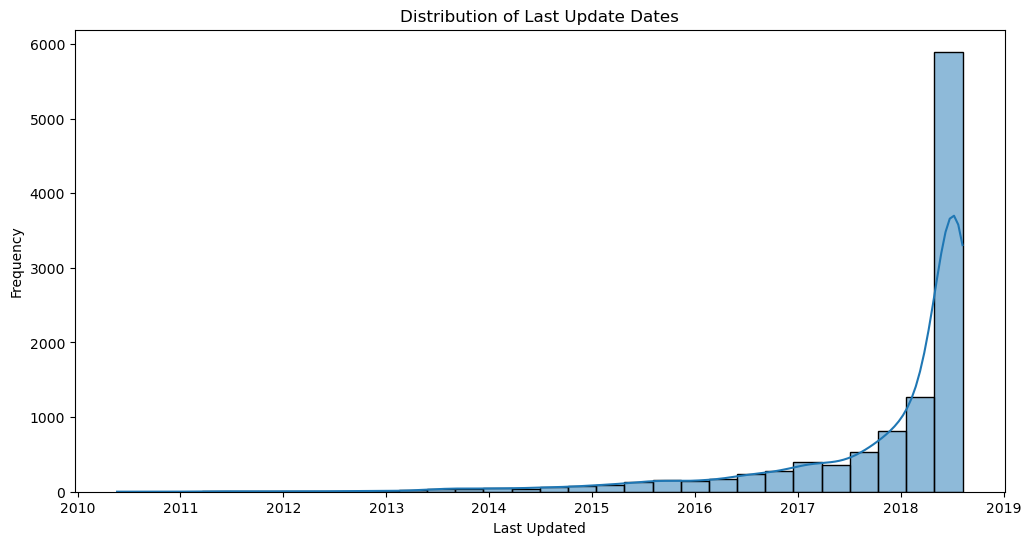

In [9]:
#task17
# Load the Google Playstore dataset
file_path = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
playstore_data = pd.read_csv(file_path)

# Ensure 'Last Updated' is treated as a string
playstore_data['Last Updated'] = playstore_data['Last Updated'].astype(str)

# Handle non-conforming date values
def parse_date(value):
    try:
        return pd.to_datetime(value, errors='coerce')
    except:
        return pd.NaT

# Apply the date parsing function to 'Last Updated' column
playstore_data['Last Updated'] = playstore_data['Last Updated'].apply(parse_date)

# Drop rows with NaT (Not a Time) values in 'Last Updated' column
playstore_data = playstore_data.dropna(subset=['Last Updated'])

# Analyze the distribution of last update dates
plt.figure(figsize=(12, 6))
sns.histplot(playstore_data['Last Updated'], bins=30, kde=True)
plt.title('Distribution of Last Update Dates')
plt.xlabel('Last Updated')
plt.ylabel('Frequency')
plt.show()
